In [2]:
import pandas as pd
import os
import sklearn.model_selection as test_train_split
import torch
import torch.nn as nn
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split

In [3]:
from ML_package.utils import ML_Utils
base_controller = ML_Utils()

2025-06-11 06:06:34,018 - INFO - ML_Base_Controller initialized.


In [4]:
data = pd.read_csv(r"D:\Code for tutorials\Machine Learning\datasets\Heart Disease\heart.xls")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
X = data.drop('target', axis=1)
y = data['target']

In [6]:
X = base_controller.feature_scaling(X)

In [7]:
X = torch.tensor(X,dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1) 

In [8]:
dataset = TensorDataset(X,y)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [9]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [10]:
class HeartDisease(nn.Module):
    def __init__(self,input_dim):
        super(HeartDisease,self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,1),
            nn.Sigmoid()
        )
    def forward(self,x):
        return self.network(x)
    
input_dim = X.shape[1]
model  = HeartDisease(input_dim)

In [11]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [12]:
loss_list = []
# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for batch_x, batch_y in train_loader:
        y_pred = model(batch_x)
        loss = criterion(y_pred, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_list.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch 10/50, Loss: 0.1802
Epoch 20/50, Loss: 0.0942
Epoch 30/50, Loss: 0.0109
Epoch 40/50, Loss: 0.0068
Epoch 50/50, Loss: 0.0029


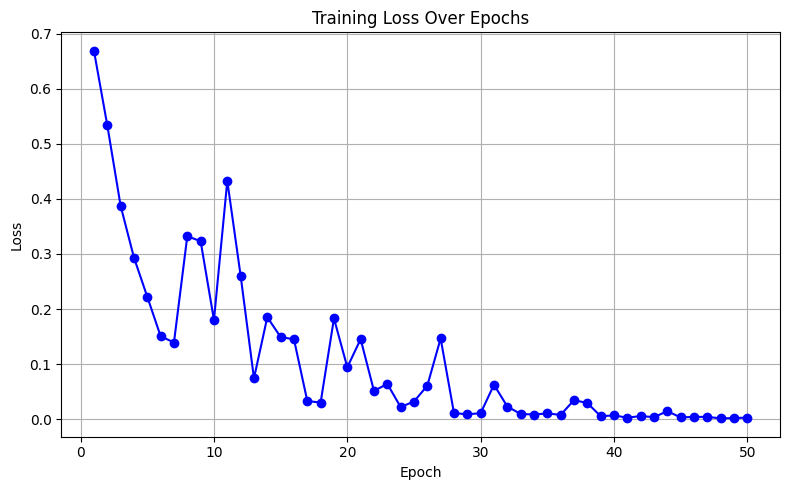

2025-06-11 06:06:49,890 - INFO - Successfully plotted loss curve.


In [13]:
base_controller.plot_loss_curve(loss_list)

In [14]:
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        preds = model(batch_x)
        preds = torch.round(preds)  # Convert sigmoid outputs to 0/1
        y_true.extend(batch_y.numpy())
        y_pred.extend(preds.numpy())
        



In [15]:
# print("Accuracy:", accuracy_score(y_true, y_pred))
# print("Classification Report:\n", classification_report(y_true, y_pred))

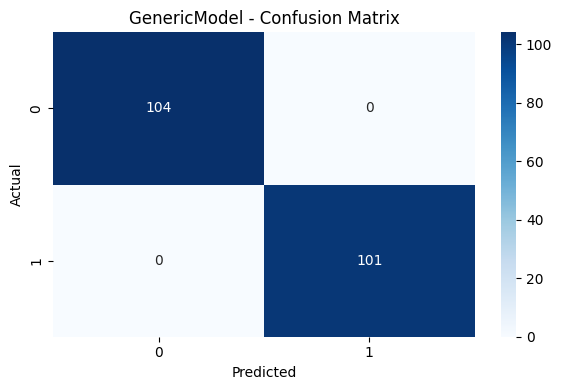

2025-06-11 06:06:50,140 - INFO - Evaluation - GenericModel
2025-06-11 06:06:50,140 - INFO - type: Classifier
2025-06-11 06:06:50,141 - INFO - accuracy: 1.0
2025-06-11 06:06:50,142 - INFO - precision: 1.0
2025-06-11 06:06:50,142 - INFO - recall: 1.0
2025-06-11 06:06:50,143 - INFO - f1_score: 1.0
2025-06-11 06:06:50,143 - INFO - mean_squared_error: 0.0
2025-06-11 06:06:50,144 - INFO - mean_absolute_error: 0.0
2025-06-11 06:06:50,144 - INFO - classification_report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       104
         1.0       1.00      1.00      1.00       101

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

2025-06-11 06:06:50,672 - INFO - Saved evaluation results to D:\Code for tutorials\Machine Learning\Results\heart_disease_dl.csv


In [16]:
result = base_controller.evaluate_model(y_true, y_pred,model,confusion_matrix_plot=True,save_results=True,results_name="heart_disease_dl.csv")

In [17]:
base_controller.save_Dl_model_to_path(model, "heart_disease_model.pth")

2025-06-11 06:06:50,700 - INFO - DL model saved at: D:\Code for tutorials\Machine Learning\saved_models\heart_disease_model.pth.pth


'D:\\Code for tutorials\\Machine Learning\\saved_models\\heart_disease_model.pth.pth'